In [193]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

In [89]:
from pymc3.data import Minibatch

In [132]:
n_subjects = int(10)
n_obs = 200
cov = 2. * pm.gp.cov.RatQuad(1, 0.2, 0.1)
X = np.linspace(0, 2, n_obs)[:,None]
K = cov(X).eval()

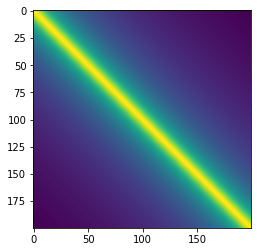

In [133]:
plt.imshow(K)

In [139]:
fulldata = pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K, shape=(200,)).random(size=n_subjects) + \
           pm.Normal.dist(2, 3).random(size=(n_subjects,1))
batchsize= 4
batches = Minibatch(fulldata, (batchsize,))

/home/mach1ne/anaconda3/envs/phd_clean/lib/python3.7/site-packages/pymc3/data.py:307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  self.shared = theano.shared(data[in_memory_slc])


In [140]:
batches.eval().shape

(4, 200)

In [141]:
fulldata.shape

(10, 200)

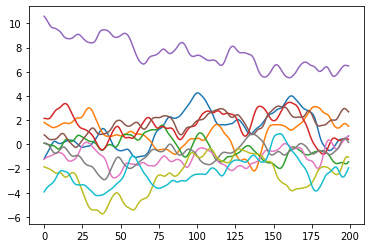

In [142]:
plt.plot(np.arange(200),fulldata.T);

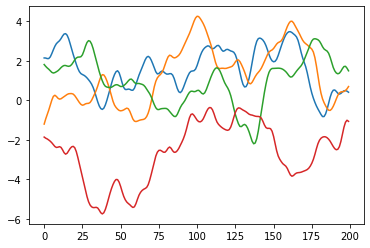

In [147]:
plt.plot(np.arange(200), batches.eval().T);

In [179]:
with pm.Model() as model:
    # an informed prior
    mu = pm.Normal('shiftmu', np.mean(fulldata), 10)
    sigma = pm.HalfCauchy('sigma', 2.5)
    cov = 2. * pm.gp.cov.RatQuad(1, 0.2, 0.1)
    gp = pm.gp.Latent(cov_func=cov)
    f = gp.prior('f', X=X)
    y_pred = pm.Normal('infer', f+mu, sigma, observed = fulldata) #= batches, total_size= n_subjects)
    #approximation = pm.fit()
    trace = pm.sample(5000, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [f_rotated_, sigma, shiftmu]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 725 seconds.


In [182]:
with model:
    #trace = approximation.sample()
    trace_samples = pm.sample_posterior_predictive(trace,
                                          vars=[y_pred, mu,f, sigma],
                                          samples=500)

/home/mach1ne/anaconda3/envs/phd_clean/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


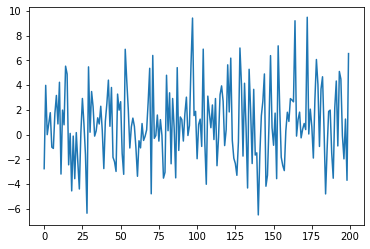

In [183]:
plt.plot(trace_samples['infer'][0, 0, :])

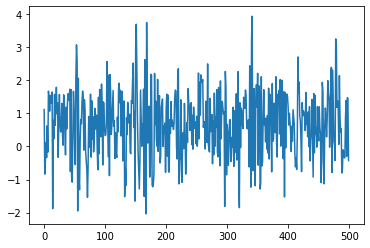

In [184]:
plt.plot(trace_samples['shiftmu'])

In [185]:
trace_samples['f'].shape

(500, 200)

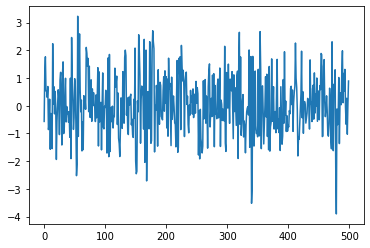

In [186]:
plt.plot(trace_samples['f'][:, 0]);

In [190]:
trace_samples['shiftmu'].mean()

0.6693357833482961

In [191]:
trace_samples['f'].mean()

-0.06957440092085203

In [192]:
trace_samples['sigma'].mean()

2.9566232242404484

/home/mach1ne/anaconda3/envs/phd_clean/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'shiftmu'}>,
        <AxesSubplot:title={'center':'shiftmu'}>],
       [<AxesSubplot:title={'center':'f_rotated_'}>,
        <AxesSubplot:title={'center':'f_rotated_'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'f'}>,
        <AxesSubplot:title={'center':'f'}>]], dtype=object)

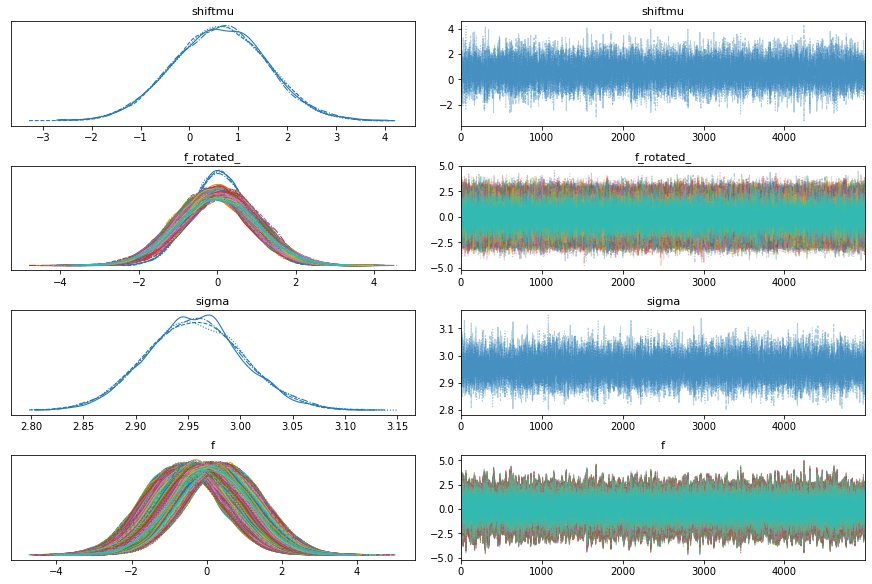

In [196]:
az.plot_trace(trace)

In [203]:
n_subjects = int(10)
n_obs = 200
cov = 2. * pm.gp.cov.RatQuad(1, 0.2, 0.1)
X = np.linspace(0, 2, n_obs)[:,None]
K = cov(X).eval()
fulldata = pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K, shape=(200,)).random(size=n_subjects) \
           # + pm.Normal.dist(2, 3).random(size=(n_subjects,1))

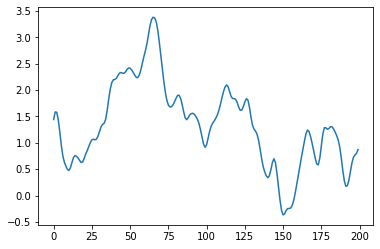

In [204]:
plt.plot(fulldata[0,:]);

In [3]:
import pymc3 as pm

In [4]:
from pymc3.gp.util import cholesky, stabilize
from pymc3.gp.cov import Constant, Covariance

In [7]:
with pm.Model() as model:
    # Specify the covariance function.
    cov_func = pm.gp.cov.Constant(0.1)
    #stabilize(cov_func)

In [10]:
cov_func

In [11]:
with pm.Model() as model:
    mu = pm.gp.mean.Zero()
    cov = 2 * pm.gp.cov.RatQuad(1, 0.2, 0.1)
    v = pm.Normal('_rotated_', mu=0.0, sigma=1.0, shape=200)
    a = cholesky(cov)
    #f = pm.Deterministic('f', mu + cholesky(cov).dot(v))
    

TypeError: Unsupported dtype for TensorType: object